# Installing and Importing Dependencies

In [1]:
# !pip install easyocr
# !pip install imutils

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
# import easyocr

In [3]:
import easyocr


# Read in Image, Grayscale and Blur

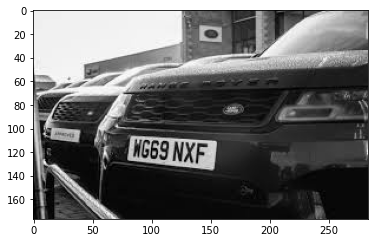

In [7]:
img = cv2.imread('test5.jpg')            # reading image 
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # converting the image to blue green red 2 gray 
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)) #showing img in desired color we can drop that also but it looks a lil bit vague 
# plt.imshow(gray)

# Apply filter and find edges for localisation

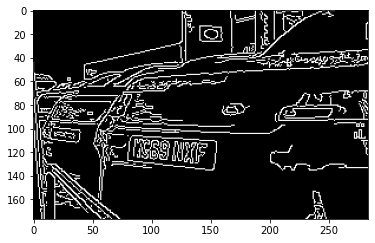

In [8]:
bfilter = cv2.bilateralFilter(gray,11,17,17)   #Noise reduction
edged = cv2.Canny(bfilter,30,200)              #Edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

# Find Contours and apply mask

In [9]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea, reverse=True)[:10]

In [10]:
location = None
for contour in contours:
    approx=cv2.approxPolyDP(contour,10,True)
    if len(approx)==4:
        location = approx
        break
    

In [11]:
location

array([[[ 82, 108]],

       [[ 80, 127]],

       [[153, 134]],

       [[153, 110]]], dtype=int32)

In [12]:
mask = np.zeros(gray.shape, np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

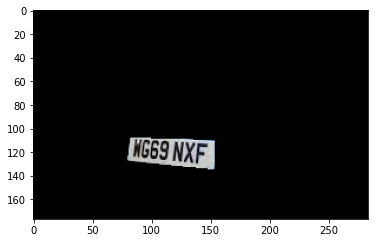

In [13]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

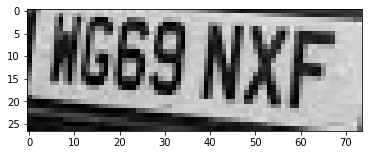

In [14]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_image=gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

# Use Easy OCR to extract Text

In [15]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [72, 0], [72, 24], [0, 24]], '0G69 NXF', 0.5309709015615518)]

# Render Results

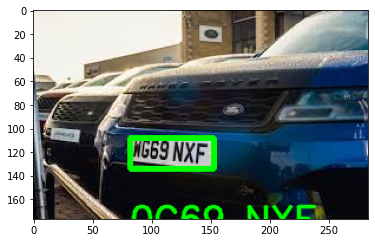

In [16]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0],approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))     